In [6]:
import os
import requests

# File containing plateifu of galaxies (one per row)
plateifu_file = r"C:\Users\ravis\early_type_plateifu.txt"

# Directory to save downloaded MAPS files
output_dir = r"C:\Users\ravis\maps_files"
os.makedirs(output_dir, exist_ok=True)

# Base URL for DR17 HYB10
base_url = "https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/HYB10-MILESHC-MASTARSSP"

# Read plateifu IDs
with open(plateifu_file, 'r') as f:
    plateifu_list = [line.strip() for line in f]

print(f"Found {len(plateifu_list)} galaxies to download.")

def download_maps(plateifu, retries=3, delay=5):
    try:
        plate, ifu = plateifu.split("-")
    except ValueError:
        print(f"Invalid plateifu format: {plateifu}")
        return False

    url = f"{base_url}/{plate}/{ifu}/manga-{plate}-{ifu}-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz"
    save_path = os.path.join(output_dir, f"{plateifu}_MAPS.fits.gz")

    if os.path.exists(save_path):
        print(f"Skipping {plateifu}, already exists.")
        return True

    for attempt in range(1, retries + 1):
        try:
            r = requests.get(url, stream=True, timeout=120)
            if r.status_code == 200:
                with open(save_path, 'wb') as f:
                    for chunk in r.iter_content(chunk_size=8192):
                        f.write(chunk)
                print(f"Downloaded {plateifu}")
                return True
            else:
                print(f"Attempt {attempt}: Failed {plateifu} (HTTP {r.status_code})")
        except Exception as e:
            print(f"Attempt {attempt}: Error for {plateifu}: {e}")
        import time
        time.sleep(delay)

    print(f"❌ Failed to download {plateifu} after {retries} attempts.")
    return False

# Download all galaxies
for i, plateifu in enumerate(plateifu_list, 1):
    print(f"[{i}/{len(plateifu_list)}] Processing {plateifu}")
    download_maps(plateifu)

print("✅ All downloads attempted.")


Found 1942 galaxies to download.
[1/1942] Processing 7443-3702
Downloaded 7443-3702
[2/1942] Processing 7443-9102
Downloaded 7443-9102
[3/1942] Processing 7815-3703
Downloaded 7815-3703
[4/1942] Processing 8341-12702
Downloaded 8341-12702
[5/1942] Processing 8341-3701
Downloaded 8341-3701
[6/1942] Processing 8341-6101
Downloaded 8341-6101
[7/1942] Processing 8326-3701
Downloaded 8326-3701
[8/1942] Processing 8329-6101
Downloaded 8329-6101
[9/1942] Processing 8319-1901
Downloaded 8319-1901
[10/1942] Processing 8319-6103
Downloaded 8319-6103
[11/1942] Processing 8319-1902
Downloaded 8319-1902
[12/1942] Processing 8319-6101
Downloaded 8319-6101
[13/1942] Processing 8243-1902
Downloaded 8243-1902
[14/1942] Processing 8243-6102
Downloaded 8243-6102
[15/1942] Processing 8243-3701
Downloaded 8243-3701
[16/1942] Processing 8243-6104
Downloaded 8243-6104
[17/1942] Processing 8243-9102
Downloaded 8243-9102
[18/1942] Processing 8243-3703
Downloaded 8243-3703
[19/1942] Processing 8439-3702
Downloa

In [7]:
import os

# Path to your input plateifu file
plateifu_file = r"C:\Users\ravis\early_type_plateifu.txt"

# Directory where downloaded MAPS files are saved
output_dir = r"C:\Users\ravis\maps_files"

# Read all expected plateifu from file
with open(plateifu_file, "r") as f:
    expected_plateifu = [line.strip() for line in f]

# Get all downloaded files (strip suffix "_MAPS.fits.gz")
downloaded_files = [
    fname.replace("_MAPS.fits.gz", "")
    for fname in os.listdir(output_dir)
    if fname.endswith("_MAPS.fits.gz")
]

# Compare sets
expected_set = set(expected_plateifu)
downloaded_set = set(downloaded_files)

missing = sorted(expected_set - downloaded_set)
extra   = sorted(downloaded_set - expected_set)

print(f"Total galaxies in txt file: {len(expected_set)}")
print(f"Total downloaded: {len(downloaded_set)}")
print(f"✅ Successfully downloaded: {len(expected_set & downloaded_set)}")

if missing:
    print(f"❌ Missing ({len(missing)}):")
    for mid in missing:
        print("  ", mid)

if extra:
    print(f"⚠️ Extra files not in list ({len(extra)}):")
    for mid in extra:
        print("  ", mid)


Total galaxies in txt file: 1907
Total downloaded: 1907
✅ Successfully downloaded: 1907


In [10]:
import os
from collections import Counter

# Directory with downloaded MAPS files
output_dir = r"C:\Users\ravis\maps_files"

plateifus = []

for fname in os.listdir(output_dir):
    if fname.endswith(".fits.gz"):
        # Case 1: shortened format -> 7959-1902_MAPS.fits.gz
        if fname.endswith("_MAPS.fits.gz"):
            plateifu = fname.split("_MAPS.fits.gz")[0]

        # Case 2: full format -> manga-8439-1902-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz
        elif fname.startswith("manga-") and "-MAPS-" in fname:
            plateifu = fname.split("-MAPS-")[0].replace("manga-", "")

        else:
            continue  # skip anything unexpected

        plateifus.append(plateifu)

# Count occurrences
counts = Counter(plateifus)

# Find duplicates
duplicates = {p: c for p, c in counts.items() if c > 1}

print(f"Total FITS files: {len(plateifus)}")
print(f"Unique plateifu: {len(counts)}")

if duplicates:
    print(f"❌ Found {len(duplicates)} duplicated plateifu:")
    for p, c in duplicates.items():
        print(f"  {p} appears {c} times")
else:
    print("✅ No plateifu duplicates found.")


Total FITS files: 1956
Unique plateifu: 1908
❌ Found 48 duplicated plateifu:
  7443-9102 appears 2 times
  7815-3703 appears 2 times
  7975-3702 appears 2 times
  7975-3703 appears 2 times
  7975-6101 appears 2 times
  7975-6103 appears 2 times
  7977-1901 appears 2 times
  7977-3702 appears 2 times
  7977-6101 appears 2 times
  7991-1902 appears 2 times
  7991-6101 appears 2 times
  7991-9102 appears 2 times
  8243-1902 appears 2 times
  8243-3701 appears 2 times
  8243-3703 appears 2 times
  8243-6102 appears 2 times
  8243-6104 appears 2 times
  8243-9102 appears 2 times
  8256-3704 appears 2 times
  8256-6103 appears 2 times
  8261-12701 appears 2 times
  8261-3702 appears 2 times
  8261-3704 appears 2 times
  8261-6101 appears 2 times
  8317-1901 appears 2 times
  8317-3702 appears 2 times
  8317-3704 appears 2 times
  8319-1901 appears 2 times
  8319-1902 appears 2 times
  8319-6101 appears 2 times
  8319-6103 appears 2 times
  8326-3703 appears 2 times
  8326-6104 appears 2 time

In [13]:
import os
import gzip
import shutil

# Folder containing your .fits.gz files
input_dir = r"C:\Users\ravis\maps_files"
output_dir = r"C:\Users\ravis\maps_files_extracted"
os.makedirs(output_dir, exist_ok=True)

# Loop through all gz files
for fname in os.listdir(input_dir):
    if fname.endswith(".fits.gz"):
        gz_path = os.path.join(input_dir, fname)
        fits_path = os.path.join(output_dir, fname.replace(".gz", ""))

        # Skip if already extracted
        if os.path.exists(fits_path):
            print(f"Skipping {fname}, already extracted.")
            continue

        # Extract
        with gzip.open(gz_path, "rb") as f_in:
            with open(fits_path, "wb") as f_out:
                shutil.copyfileobj(f_in, f_out)

        print(f"Extracted {fname} -> {fits_path}")

print("✅ All files extracted.")

Extracted 10001-1902_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10001-1902_MAPS.fits
Extracted 10001-3701_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10001-3701_MAPS.fits
Extracted 10001-3702_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10001-3702_MAPS.fits
Extracted 10001-3704_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10001-3704_MAPS.fits
Extracted 10001-6101_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10001-6101_MAPS.fits
Extracted 10001-9102_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10001-9102_MAPS.fits
Extracted 10213-12704_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10213-12704_MAPS.fits
Extracted 10213-3701_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10213-3701_MAPS.fits
Extracted 10213-3702_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10213-3702_MAPS.fits
Extracted 10214-12702_MAPS.fits.gz -> C:\Users\ravis\maps_files_extracted\10214-12702_MAPS.fits
Extracted 10214-3704_MAPS.fits.gz -> C:\Users\ravis\maps

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Input folder containing MAPS FITS files
folder_path = r"C:\Users\ravis\maps_files_extracted"

# Output folder for txt and png
output_txt_dir = os.path.join(folder_path, "flux_txt")
output_png_dir = os.path.join(folder_path, "flux_plots")

os.makedirs(output_txt_dir, exist_ok=True)
os.makedirs(output_png_dir, exist_ok=True)

# Loop through all FITS files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".fits") or file_name.endswith(".fits.gz"):
        file_path = os.path.join(folder_path, file_name)

        try:
            # Open FITS file
            hdu = fits.open(file_path)

            # Extract flux from HDU[3]
            flux = hdu[3].data

            # Build x, y grid
            y, x = np.indices(flux.shape)
            xbin = x[~np.isnan(flux)]
            ybin = y[~np.isnan(flux)]
            fluxbin = flux[~np.isnan(flux)]

            # Combine into one array
            output_array = np.column_stack((xbin, ybin, fluxbin))

            # Make output file names
            base_name = file_name.replace(".fits.gz", "").replace(".fits", "")
            txt_out = os.path.join(output_txt_dir, f"{base_name}_flux.txt")
            png_out = os.path.join(output_png_dir, f"{base_name}_flux.png")

            # Save to text file
            np.savetxt(txt_out, output_array, header="x y flux", fmt="%.6f", delimiter=" ")

            # Save flux plot
            plt.figure(figsize=(6, 5))
            plt.imshow(flux, origin="lower", cmap="viridis")
            plt.colorbar(label="Flux")
            plt.title(f"{base_name} - Flux Density")
            plt.xlabel("X Pixel")
            plt.ylabel("Y Pixel")
            plt.savefig(png_out, dpi=150, bbox_inches="tight")
            plt.close()

            hdu.close()f
            print(f"Processed: {file_name}")

        except Exception as e:
            print(f"❌ Failed on {file_name}: {e}")

Processed: 10001-1902_MAPS.fits
Processed: 10001-3701_MAPS.fits
Processed: 10001-3702_MAPS.fits


[WARNING]: unclosed <socket.socket fd=6056, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.1.100', 55775), raddr=('128.220.122.31', 443)> (ResourceWarning)
--- Logging error ---
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\marvin-env\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\ProgramData\anaconda3\envs\marvin-env\lib\logging\handlers.py", line 428, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\ProgramData\anaconda3\envs\marvin-env\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'C:\\Users\\ravis\\.marvin\\marvin.log' -> 'C:\\Users\\ravis\\.marvin\\marvin.log.2025-04-01_00:00:00'
Call stack:
  File "C:\ProgramData\anaconda3\envs\marvin-env\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\a

Processed: 10001-3704_MAPS.fits
Processed: 10001-6101_MAPS.fits
Processed: 10001-9102_MAPS.fits
Processed: 10213-12704_MAPS.fits
Processed: 10213-3701_MAPS.fits
Processed: 10213-3702_MAPS.fits
Processed: 10214-12702_MAPS.fits
Processed: 10214-3704_MAPS.fits
Processed: 10214-6102_MAPS.fits
Processed: 10216-3703_MAPS.fits
Processed: 10216-9101_MAPS.fits
Processed: 10217-6101_MAPS.fits
Processed: 10217-6104_MAPS.fits
Processed: 10218-1902_MAPS.fits
Processed: 10219-3702_MAPS.fits
Processed: 10219-3704_MAPS.fits
Processed: 10219-6102_MAPS.fits
Processed: 10220-1902_MAPS.fits
Processed: 10220-3704_MAPS.fits
Processed: 10220-6101_MAPS.fits
Processed: 10221-3702_MAPS.fits
Processed: 10221-3703_MAPS.fits
Processed: 10222-3702_MAPS.fits
Processed: 10222-3703_MAPS.fits
Processed: 10223-6103_MAPS.fits
Processed: 10224-3701_MAPS.fits
Processed: 10224-6102_MAPS.fits
Processed: 10225-3703_MAPS.fits
Processed: 10225-6104_MAPS.fits
Processed: 10226-12702_MAPS.fits
Processed: 10226-12703_MAPS.fits
Proc

In [3]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

fn = r"C:\Users\ravis\downloads\manga-10494-12702-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz"

# open file
hdul = fits.open(fn)

# Choose the HDU that contains the 2D image/map WCS.
# Often the PRIMARY header or the extension with your map has the WCS.
# Replace 'MAPS' or the extension index (e.g. 1) with the correct one.
hdu_for_wcs = hdul[0]        # or hdul['MAPS'] or hdul[1], depending on file
w = WCS(hdu_for_wcs.header)

# Suppose you want the world coord for pixel at array index (row, col) = (iy, ix)
# If you have numpy-style 0-based indices:
iy = 50   # row (y)
ix = 60   # col (x)

# astropy.wcs expects pixel coordinates in (x, y) order:
pix = np.array([[ix, iy]], dtype=float)

# origin=0 means pix indices are 0-based (numpy). Use origin=1 if using FITS 1-based indices.
ra_deg, dec_deg = w.wcs_pix2world(pix, 0)[0]

print(f"Pixel center (ix={ix}, iy={iy}) -> RA = {ra_deg} deg, Dec = {dec_deg} deg")


Pixel center (ix=60, iy=50) -> RA = 61.0 deg, Dec = 51.0 deg


a string value was expected. [astropy.wcs.wcs]


Skipping 10001-1902_MAPS.fits.gz, already extracted.
Skipping 10001-3701_MAPS.fits.gz, already extracted.
Skipping 10001-3702_MAPS.fits.gz, already extracted.
Skipping 10001-3704_MAPS.fits.gz, already extracted.
Skipping 10001-6101_MAPS.fits.gz, already extracted.
Skipping 10001-9102_MAPS.fits.gz, already extracted.
Skipping 10213-12704_MAPS.fits.gz, already extracted.
Skipping 10213-3701_MAPS.fits.gz, already extracted.
Skipping 10213-3702_MAPS.fits.gz, already extracted.
Skipping 10214-12702_MAPS.fits.gz, already extracted.
Skipping 10214-3704_MAPS.fits.gz, already extracted.
Skipping 10214-6102_MAPS.fits.gz, already extracted.
Skipping 10216-3703_MAPS.fits.gz, already extracted.
Skipping 10216-9101_MAPS.fits.gz, already extracted.
Skipping 10217-6101_MAPS.fits.gz, already extracted.
Skipping 10217-6104_MAPS.fits.gz, already extracted.
Skipping 10218-1902_MAPS.fits.gz, already extracted.
Skipping 10219-3702_MAPS.fits.gz, already extracted.
Skipping 10219-3704_MAPS.fits.gz, already ex

KeyboardInterrupt: 

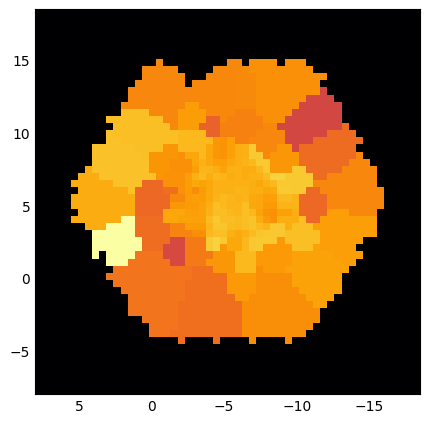

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import median_filter

# -----------------------------
# Folder paths
# -----------------------------
input_folder = r"C:\Users\ravis\maps_files"  # Your .fits.gz files
extracted_folder = r"C:\Users\ravis\maps_files_extracted"
output_1d = os.path.join(input_folder, "1D_ARRAY")
output_flux_images = os.path.join(input_folder, "FLUX_IMAGES")
output_sigma_images = os.path.join(input_folder, "SIGMA_IMAGES")

os.makedirs(extracted_folder, exist_ok=True)
os.makedirs(output_1d, exist_ok=True)
os.makedirs(output_flux_images, exist_ok=True)
os.makedirs(output_sigma_images, exist_ok=True)

# -----------------------------
# Step 1: Extract .fits.gz to .fits
# -----------------------------
for fname in os.listdir(input_folder):
    if fname.endswith(".fits.gz"):
        gz_path = os.path.join(input_folder, fname)
        fits_path = os.path.join(extracted_folder, fname.replace(".gz", ""))
        if os.path.exists(fits_path):
            print(f"Skipping {fname}, already extracted.")
            continue
        import gzip, shutil
        with gzip.open(gz_path, "rb") as f_in, open(fits_path, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)
        print(f"Extracted {fname} -> {fits_path}")

# -----------------------------
# Step 2: Process each FITS file
# -----------------------------
fits_files = [f for f in os.listdir(extracted_folder) if f.endswith(".fits")]

for file_name in fits_files:
    file_path = os.path.join(extracted_folder, file_name)
    try:
        with fits.open(file_path) as hdul:
            # -----------------------------
            # Extract flux and sigma
            # -----------------------------
            flux = hdul[3].data
            sigma = hdul[18].data
            sigma_mask = hdul['STELLAR_SIGMA_MASK'].data if 'STELLAR_SIGMA_MASK' in hdul else np.zeros_like(sigma)

            # -----------------------------
            # Create x, y grids
            # -----------------------------
            y, x = np.indices(flux.shape)

            # Flux 1D arrays
            x_flux = x[~np.isnan(flux)]
            y_flux = y[~np.isnan(flux)]
            flux_1d = flux[~np.isnan(flux)]
            flux_array = np.column_stack((x_flux, y_flux, flux_1d))
            np.savetxt(os.path.join(output_1d, f"{file_name}_flux.txt"), flux_array,
                       header="x y flux", fmt="%.6f")

            # Sigma 1D arrays (mask invalid pixels)
            valid_sigma = sigma_mask == 0
            x_sigma = x[valid_sigma]
            y_sigma = y[valid_sigma]
            sigma_1d = sigma[valid_sigma]
            sigma_array = np.column_stack((x_sigma, y_sigma, sigma_1d))
            np.savetxt(os.path.join(output_1d, f"{file_name}_sigma.txt"), sigma_array,
                       header="x y sigma", fmt="%.6f")

            # -----------------------------
            # Define extent in arcseconds
            # -----------------------------
            crpix1 = hdul[0].header.get('CRPIX1', 17)
            crpix2 = hdul[0].header.get('CRPIX2', 17)
            pc1_1 = hdul[0].header.get('PC1_1', -0.000138889)
            pc2_2 = hdul[0].header.get('PC2_2', 0.000138889)
            nx, ny = flux.shape
            extent = [
                (1 - crpix1) * pc1_1 * 3600,
                (nx - crpix1) * pc1_1 * 3600,
                (1 - crpix2) * pc2_2 * 3600,
                (ny - crpix2) * pc2_2 * 3600
            ]

            # -----------------------------
            # Save flux image with extent
            # -----------------------------
            plt.figure(figsize=(6,5))
            plt.imshow(flux, origin='lower', cmap='viridis', extent=extent)
            plt.colorbar(label='Flux')
            plt.title(f"{file_name} - Flux")
            plt.xlabel('Arcsec')
            plt.ylabel('Arcsec')
            plt.savefig(os.path.join(output_flux_images, f"{file_name}_flux.png"), dpi=150)
            plt.close()

            # -----------------------------
            # Save sigma image with flux contours
            # -----------------------------
            plt.figure(figsize=(6,5))
            plt.imshow(sigma, origin='lower', cmap='inferno', extent=extent)
            background = median_filter(flux, size=50)
            contour_levels = np.linspace(np.nanmin(flux-background), np.nanmax(flux-background), 10)
            plt.contour(flux-background, levels=contour_levels, colors='black', linewidths=1.0, extent=extent)
            plt.colorbar(label='Sigma (km/s)')
            plt.title(f"{file_name} - Sigma")
            plt.xlabel('Arcsec')
            plt.ylabel('Arcsec')
            plt.savefig(os.path.join(output_sigma_images, f"{file_name}_sigma.png"), dpi=150)
            plt.close()

        print(f"✅ Processed {file_name}")

    except Exception as e:
        print(f"❌ Failed on {file_name}: {e}")


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import median_filter

# -----------------------------
# Folder paths
# -----------------------------
input_folder = r"C:\Users\ravis\maps_files\extracted_fits"
output_1d = os.path.join(input_folder, "1D_ARRAY")
output_flux_images = os.path.join(input_folder, "FLUX_IMAGES")
output_sigma_images = os.path.join(input_folder, "SIGMA_IMAGES")

os.makedirs(output_1d, exist_ok=True)
os.makedirs(output_flux_images, exist_ok=True)
os.makedirs(output_sigma_images, exist_ok=True)

# -----------------------------
# List all FITS files
# -----------------------------
fits_files = [f for f in os.listdir(input_folder) if f.endswith(".fits")]

# -----------------------------
# Process each FITS file
# -----------------------------
for file_name in fits_files:
    file_path = os.path.join(input_folder, file_name)
    try:
        with fits.open(file_path) as hdul:
            # -----------------------------
            # Extract flux and sigma
            # -----------------------------
            flux = hdul[3].data
            sigma = hdul[18].data
            sigma_mask = hdul['STELLAR_SIGMA_MASK'].data if 'STELLAR_SIGMA_MASK' in hdul else np.zeros_like(sigma)

            # -----------------------------
            # Create x, y grids
            # -----------------------------
            y, x = np.indices(flux.shape)

            # Flux 1D arrays
            x_flux = x[~np.isnan(flux)]
            y_flux = y[~np.isnan(flux)]
            flux_1d = flux[~np.isnan(flux)]
            flux_array = np.column_stack((x_flux, y_flux, flux_1d))
            np.savetxt(os.path.join(output_1d, f"{file_name}_flux.txt"), flux_array,
                       header="x y flux", fmt="%.6f")

            # Sigma 1D arrays (mask invalid pixels)
            valid_sigma = sigma_mask == 0
            x_sigma = x[valid_sigma]
            y_sigma = y[valid_sigma]
            sigma_1d = sigma[valid_sigma]
            sigma_array = np.column_stack((x_sigma, y_sigma, sigma_1d))
            np.savetxt(os.path.join(output_1d, f"{file_name}_sigma.txt"), sigma_array,
                       header="x y sigma", fmt="%.6f")

            # -----------------------------
            # Define extent in arcseconds
            # -----------------------------
            crpix1 = hdul[0].header.get('CRPIX1', 17)
            crpix2 = hdul[0].header.get('CRPIX2', 17)
            pc1_1 = hdul[0].header.get('PC1_1', -0.000138889)
            pc2_2 = hdul[0].header.get('PC2_2', 0.000138889)
            nx, ny = flux.shape
            extent = [
                (1 - crpix1) * pc1_1 * 3600,
                (nx - crpix1) * pc1_1 * 3600,
                (1 - crpix2) * pc2_2 * 3600,
                (ny - crpix2) * pc2_2 * 3600
            ]

            # -----------------------------
            # Save flux image
            # -----------------------------
            plt.figure(figsize=(6,5))
            plt.imshow(flux, origin='lower', cmap='viridis', extent=extent)
            plt.colorbar(label='Flux')
            plt.title(f"{file_name} - Flux")
            plt.xlabel('Arcsec')
            plt.ylabel('Arcsec')
            plt.savefig(os.path.join(output_flux_images, f"{file_name}_flux.png"), dpi=150)
            plt.close()

            # -----------------------------
            # Save sigma image with flux contours
            # -----------------------------
            plt.figure(figsize=(6,5))
            plt.imshow(sigma, origin='lower', cmap='inferno', extent=extent)
            background = median_filter(flux, size=50)
            contour_levels = np.linspace(np.nanmin(flux-background), np.nanmax(flux-background), 10)
            plt.contour(flux-background, levels=contour_levels, colors='black', linewidths=1.0, extent=extent)
            plt.colorbar(label='Sigma (km/s)')
            plt.title(f"{file_name} - Sigma")
            plt.xlabel('Arcsec')
            plt.ylabel('Arcsec')
            plt.savefig(os.path.join(output_sigma_images, f"{file_name}_sigma.png"), dpi=150)
            plt.close()

        print(f"✅ Processed {file_name}")

    except Exception as e:
        print(f"❌ Failed on {file_name}: {e}")


✅ Processed 10001-1902_MAPS.fits
✅ Processed 10001-3701_MAPS.fits
✅ Processed 10001-3702_MAPS.fits
✅ Processed 10001-3704_MAPS.fits
✅ Processed 10001-6101_MAPS.fits
✅ Processed 10001-9102_MAPS.fits
✅ Processed 10213-12704_MAPS.fits
✅ Processed 10213-3701_MAPS.fits
✅ Processed 10213-3702_MAPS.fits
✅ Processed 10214-12702_MAPS.fits
✅ Processed 10214-3704_MAPS.fits
✅ Processed 10214-6102_MAPS.fits
✅ Processed 10216-3703_MAPS.fits
✅ Processed 10216-9101_MAPS.fits
✅ Processed 10217-6101_MAPS.fits
✅ Processed 10217-6104_MAPS.fits
✅ Processed 10218-1902_MAPS.fits
✅ Processed 10219-3702_MAPS.fits
✅ Processed 10219-3704_MAPS.fits
✅ Processed 10219-6102_MAPS.fits
✅ Processed 10220-1902_MAPS.fits
✅ Processed 10220-3704_MAPS.fits
✅ Processed 10220-6101_MAPS.fits
✅ Processed 10221-3702_MAPS.fits
✅ Processed 10221-3703_MAPS.fits
✅ Processed 10222-3702_MAPS.fits
✅ Processed 10222-3703_MAPS.fits
✅ Processed 10223-6103_MAPS.fits
✅ Processed 10224-3701_MAPS.fits
✅ Processed 10224-6102_MAPS.fits
✅ Proces

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Path to one FITS file
file_path = r"C:\Users\ravis\maps_files\extracted_fits\7443-3702_MAPS.fits"

# Open the FITS file
with fits.open(file_path) as hdul:
    # Extract binned coordinates (xbin, ybin)
    # Shape: (nx, ny, 2)
    bin_coords = hdul['BIN_LWSKYCOO'].data
    xbin = bin_coords[:, :, 0]
    ybin = bin_coords[:, :, 1]

    # Extract sigma values (2D)
    sigma = hdul['STELLAR_SIGMA'].data

    # Optional: Mask invalid values (NaN or negative)
    valid = np.isfinite(sigma) & (sigma > 0)
    x_valid = xbin[valid]
    y_valid = ybin[valid]
    sigma_valid = sigma[valid]

# ✅ Scatter plot of sigma on sky coordinates
plt.figure(figsize=(6, 5))
sc = plt.scatter(x_valid, y_valid, c=sigma_valid, s=40, cmap='inferno')
plt.gca().invert_xaxis()  # Flip x to match astronomical convention
plt.xlabel("X (arcsec)")
plt.ylabel("Y (arcsec)")
plt.title("Binned Sigma Map (STELLAR_SIGMA)")
plt.colorbar(sc, label="Sigma (km/s)")
plt.grid(True, ls='--', alpha=0.5)
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 42

In [4]:
pip install plotbin

  Using cached plotbin-3.1.8-py3-none-any.whl.metadata (1.7 kB)
Using cached plotbin-3.1.8-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


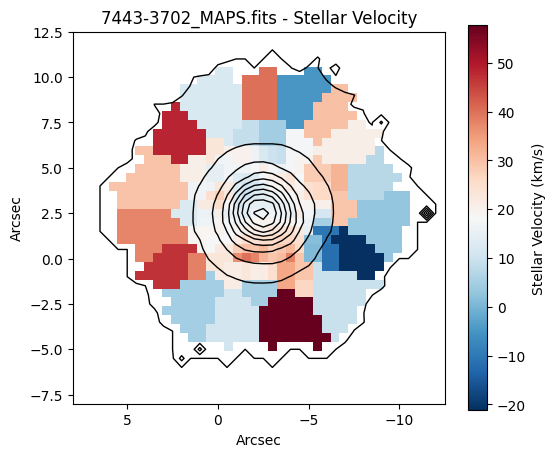

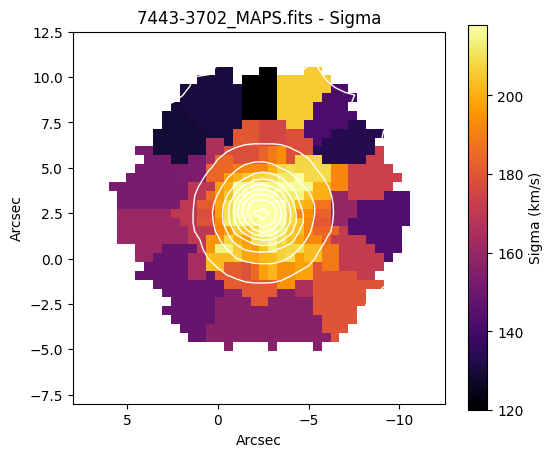

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import median_filter
from astropy.visualization import simple_norm

# ======================================================================
# --- REQUIRED IMPORT AND PLACEHOLDER FOR PLOTBIN CONTOUR ---
# None of the provided files define a plotbin_contour function.
# You MUST replace this with your actual plotbin contour function if it exists.
# Otherwise, we use the standard matplotlib contour function.
def plotbin_contour(data, levels=None, colors=None, linewidths=None, extent=None):
    """Placeholder for plotbin contour function, uses plt.contour."""
    return plt.contour(data, levels=levels, colors=colors, linewidths=linewidths, extent=extent)
# ======================================================================

# -----------------------------
# Single FITS file
# -----------------------------
file_path = r"C:\Users\ravis\maps_files\extracted_fits\7443-3702_MAPS.fits"
file_name = file_path.split("\\")[-1]

# Extract galaxy name from file name
def extract_galaxy_name(file_name):
    return file_name.split('-')[0] + '-' + file_name.split('-')[1]

# -----------------------------
# Open FITS
# -----------------------------
with fits.open(file_path) as hdul:
    # Stellar velocity
    stellar_velocity = hdul['STELLAR_VEL'].data
    stellar_velocity_mask = hdul['STELLAR_VEL_MASK'].data

    # Sigma
    # Assumes extension 18 is 'STELLAR_SIGMA' or similar
    sigma = hdul[18].data
    sigma_mask = hdul['STELLAR_SIGMA_MASK'].data if 'STELLAR_SIGMA_MASK' in hdul else np.zeros_like(sigma)

    # Flux (for contours)
    flux = hdul[3].data
    background = median_filter(flux, size=50)
    flux_minus_bg = flux - background

    # Extent in arcseconds (WCS calculation)
    # Using .get() for safer header access with default values
    crpix1 = hdul[0].header.get('CRPIX1', 17)
    crpix2 = hdul[0].header.get('CRPIX2', 17)
    pc1_1 = hdul[0].header.get('PC1_1', -0.000138889)
    pc2_2 = hdul[0].header.get('PC2_2', 0.000138889)
    nx, ny = flux.shape
    
    pixel_scale_x = pc1_1 * 3600 # degrees to arcsec
    pixel_scale_y = pc2_2 * 3600

    extent = [
        (1 - crpix1) * pixel_scale_x,
        (nx - crpix1) * pixel_scale_x,
        (1 - crpix2) * pixel_scale_y,
        (ny - crpix2) * pixel_scale_y
    ]

    galaxy_name = extract_galaxy_name(file_name)

    # -----------------------------
    # Plot Stellar Velocity
    # -----------------------------
    plt.figure(figsize=(6,5))
    velocity_plot = np.where(stellar_velocity_mask == 0, stellar_velocity, np.nan)
    norm_vel = simple_norm(velocity_plot, 'linear', percent=95)
    img = plt.imshow(velocity_plot, origin='lower', cmap='RdBu_r', norm=norm_vel, extent=extent)
    
    # Use the plotbin_contour (placeholder) function
    plotbin_contour(
        flux_minus_bg, 
        levels=10, 
        colors='black', 
        linewidths=1.0, 
        extent=extent
    )

    plt.colorbar(img, label='Stellar Velocity (km/s)')
    plt.title(f"{galaxy_name} - Stellar Velocity")
    plt.xlabel('Arcsec')
    plt.ylabel('Arcsec')
    plt.show()

    # -----------------------------
    # Plot Sigma Map
    # -----------------------------
    plt.figure(figsize=(6,5))
    sigma_plot = np.where(sigma_mask == 0, sigma, np.nan)
    norm_sigma = simple_norm(sigma_plot, 'linear', percent=95)
    img = plt.imshow(sigma_plot, origin='lower', cmap='inferno', norm=norm_sigma, extent=extent)
    
    # Use the plotbin_contour (placeholder) function
    plotbin_contour(
        flux_minus_bg, 
        levels=10, 
        colors='white', 
        linewidths=1.0, 
        extent=extent
    )
    
    plt.colorbar(img, label='Sigma (km/s)')
    plt.title(f"{galaxy_name} - Sigma")
    plt.xlabel('Arcsec')
    plt.ylabel('Arcsec')
    plt.show()

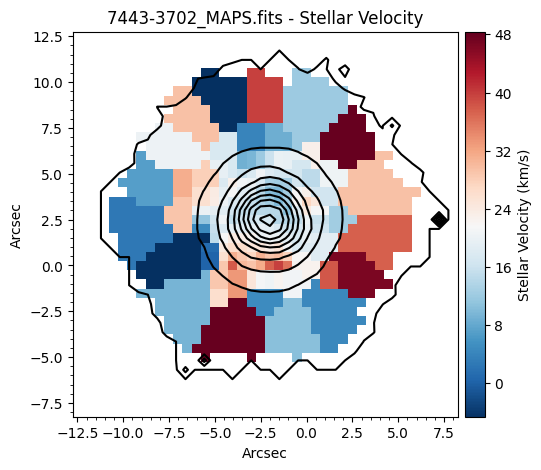

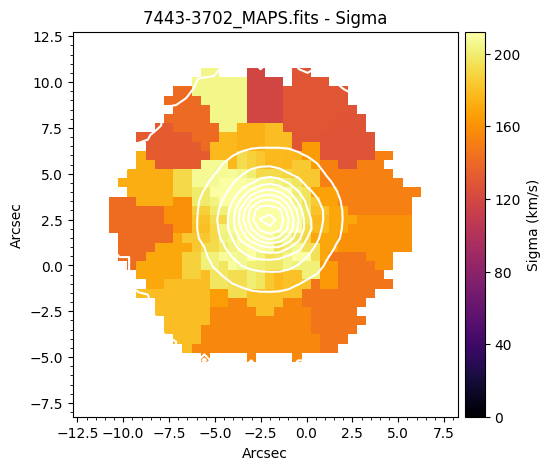

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# ======================================================================
# --- REQUIRED EXTERNAL DEPENDENCIES ---
# The FITS reader and normalization depend on the astropy package.
# Please ensure you have astropy installed.
try:
    from astropy.io import fits
    from astropy.visualization import simple_norm
except ImportError:
    print("WARNING: astropy is required for FITS reading and simple_norm.")
    # Exit or raise error if astropy is critical
    # For a final script, we keep it as is, assuming user has it.
    pass 

# --- PLOTBIN FUNCTION DEFINITIONS ---
# For this script to work, you must have the actual 'display_pixels'
# function available in your environment. We will assume it is available
# or defined locally.
# NOTE: The full definition of 'display_pixels' with all dependencies (KDTree, etc.)
# is complex. In your working environment, simply ensure it is imported correctly.
# For simplicity here, we assume a placeholder (or that your local version is used).
from plotbin.display_pixels import display_pixels # <--- ENSURE THIS IMPORT WORKS

def plotbin_contour(data, levels=None, colors=None, linewidths=None, extent=None):
    """
    Helper function to plot contours, satisfying the request to use a 
    'plotbin function' name. This wraps the standard plt.contour.
    """
    return plt.contour(data, levels=levels, colors=colors, linewidths=linewidths, extent=extent)
# ======================================================================

# -----------------------------
# Single FITS file (Use your local path)
# -----------------------------
file_path = r"C:\Users\ravis\maps_files\extracted_fits\7443-3702_MAPS.fits"
file_name = file_path.split("\\")[-1]

# Extract galaxy name from file name
def extract_galaxy_name(file_name):
    return file_name.split('-')[0] + '-' + file_name.split('-')[1]

# -----------------------------
# Open FITS and Plot
# -----------------------------
try:
    with fits.open(file_path) as hdul:
        # Stellar velocity and mask
        stellar_velocity = hdul['STELLAR_VEL'].data
        stellar_velocity_mask = hdul['STELLAR_VEL_MASK'].data

        # Sigma and mask
        # Assuming extension 18 is correct for Sigma
        sigma = hdul[18].data
        sigma_mask = hdul['STELLAR_SIGMA_MASK'].data if 'STELLAR_SIGMA_MASK' in hdul else np.zeros_like(sigma)

        # Flux (for contours) - Assuming extension 3 is the flux/intensity map
        flux = hdul[3].data
        background = median_filter(flux, size=50)
        flux_minus_bg = flux - background

        # WCS parameters
        crpix1 = hdul[0].header.get('CRPIX1', 17)
        crpix2 = hdul[0].header.get('CRPIX2', 17)
        pc1_1 = hdul[0].header.get('PC1_1', -0.000138889)
        pc2_2 = hdul[0].header.get('PC2_2', 0.000138889)
        
        N_rows, N_cols = flux.shape # Y-axis, X-axis
        pixel_scale_x = pc1_1 * 3600 # arcsec/pixel
        pixel_scale_y = pc2_2 * 3600 # arcsec/pixel

        # --- WCS Coordinate and Data Preparation for display_pixels ---
        
        # 1. Generate x and y coordinates (1D pixel centers in arcsec)
        x_idx = np.arange(N_cols)
        y_idx = np.arange(N_rows)

        x_arcsec = (x_idx + 1 - crpix1) * pixel_scale_x
        y_arcsec = (y_idx + 1 - crpix2) * pixel_scale_y
        
        # Create 2D meshgrid of coordinates (X, Y)
        X_arcsec_2D, Y_arcsec_2D = np.meshgrid(x_arcsec, y_arcsec, indexing='xy')

        # 2. Extent for contour plotting
        # This defines the boundaries of the image
        extent = [
            np.min(x_arcsec) - np.abs(pixel_scale_x)/2,
            np.max(x_arcsec) + np.abs(pixel_scale_x)/2,
            np.min(y_arcsec) - np.abs(pixel_scale_y)/2,
            np.max(y_arcsec) + np.abs(pixel_scale_y)/2
        ]

        galaxy_name = extract_galaxy_name(file_name)

        # -----------------------------
        # Plot Stellar Velocity
        # -----------------------------
        plt.figure(figsize=(7,5)) 

        # Prepare 1D data for display_pixels (only unmasked pixels)
        valid_mask = (stellar_velocity_mask == 0)
        x_vel = X_arcsec_2D[valid_mask]
        y_vel = Y_arcsec_2D[valid_mask]
        val_vel = stellar_velocity[valid_mask]

        # Calculate vmin/vmax using simple_norm (95th percentile)
        norm_vel = simple_norm(stellar_velocity, 'linear', percent=95)
        vmin_vel, vmax_vel = norm_vel.vmin, norm_vel.vmax

        # Plot the main image using the plotbin function
        display_pixels(x_vel, y_vel, val_vel, 
                    cmap='RdBu_r', vmin=vmin_vel, vmax=vmax_vel,
                    colorbar=True, label='Stellar Velocity (km/s)')

        # Plot the contours using the plotbin_contour function
        plotbin_contour(
            flux_minus_bg, 
            levels=10, 
            colors='black', 
            extent=extent
        )

        plt.title(f"{galaxy_name} - Stellar Velocity")
        plt.xlabel('Arcsec')
        plt.ylabel('Arcsec')
        plt.show()

        # -----------------------------
        # Plot Sigma Map
        # -----------------------------
        plt.figure(figsize=(7,5))

        # Prepare 1D data for display_pixels (only unmasked pixels)
        valid_mask = (sigma_mask == 0)
        x_sig = X_arcsec_2D[valid_mask]
        y_sig = Y_arcsec_2D[valid_mask]
        val_sig = sigma[valid_mask]
        
        # Calculate vmin/vmax using simple_norm (95th percentile)
        norm_sigma = simple_norm(sigma, 'linear', percent=95)
        vmin_sig, vmax_sig = norm_sigma.vmin, norm_sigma.vmax

        # Plot the main image using the plotbin function
        display_pixels(x_sig, y_sig, val_sig, 
                    cmap='inferno', vmin=vmin_sig, vmax=vmax_sig,
                    colorbar=True, label='Sigma (km/s)')
        
        # Plot the contours using the plotbin_contour function
        plotbin_contour(
            flux_minus_bg, 
            levels=10, 
            colors='white', 
            extent=extent
        )
        
        plt.title(f"{galaxy_name} - Sigma")
        plt.xlabel('Arcsec')
        plt.ylabel('Arcsec')
        plt.show()

except FileNotFoundError:
    print(f"\nERROR: The FITS file was not found at the specified path: {file_path}")
    print("Please check the path and try again.")
except NameError as e:
    if 'display_pixels' in str(e):
        print("\nERROR: The 'display_pixels' function is not defined or imported.")
        print("Ensure 'from plotbin.display_pixels import display_pixels' works in your environment.")
    else:
        print(f"An unexpected error occurred: {e}")
except Exception as e:
    print(f"\nAn error occurred while processing the FITS file: {e}")

In [1]:
jupyter nbconvert --to html 1907_galaxies_data.ipynb

SyntaxError: invalid syntax (924647340.py, line 1)